# Redes Neurais
com Scikit-Learn

Nesse tutorial vamos trabalhar alguns conceitos básicos sobre Redes Neurais. Por ser um tutorial mais básico vou utilizar o próprio scikit-learn. Um estudo mais aprofundado das redes neurais será colocado juntamente com o material do Tensorflow. 

As redes neurais vem de um desejo de criar máquinas que de alguma forma "imitem" o comportamento humano. Melhor ainda, "imitar" um comportamento que ocorre de forma natural no cérebro humano. Nós humanos conseguimos realizar tarefas que para nós são simples e imediatas, mas que ao passa-las para uma máquina não se tornam tão simples. O desenvolvimento das redes neurais parte  do princípio de construir um mecanismo que possa de alguma forma executar as tarefas realizadas pelo cérebro humano. Para entender como as redes neurais funcionam, é preciso entender como funciona o sistema nervoso humano. 

## O sistema nervoso humano

A imagem a seguir mostra o principal componente do sistema nervoso humano: os neurônios. É através deles que o cérebro transmite e processa a gama de informações que capturamos. A estrutura complexa do cérebro faz tarefas extramamente complexas parecerem triviais. 

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/redesneurais_neuronio.png">

Para entender um pouco de como o neorônio, veja o vídeo a seguir:

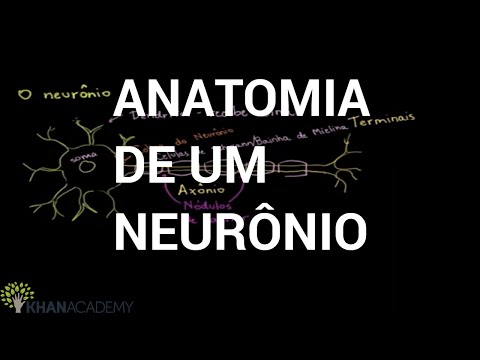

In [2]:
from IPython.display import YouTubeVideo, Image

YouTubeVideo('r8D16C6-D5M')

## Redes Neurais Artificiais (RNA)

"As RNAs são sistemas computacionais distribuídos compostos de unidades de processamento simples, densamente interconectadas. Essas unidades, conhecidas como neurônios artificiais, computam funções matemáticas. As unidades são dispostas em uma ou mais camadas e interligadas por um grade número de conexões, geralmente unidirecionais. Na maioria das arquiteturas, essas conexões, que simulam as sinapses biológicas, possuem pesos associados, que ponderam a entrada recebida por cada neurônio da rede. Os pesos podem assumir valores positivos ou negativos, dependendo se comportamento da conexão é excitatório ou inibitório, respectivamente. Os pesos têm seus valores ajustados em um processo de aprendizado e codificam o conhecimento adquirido pela rede".

A imagem a seguir mostra a arquitetura de um neurônio artificial:

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/redesneurais_rna.png">

O neurônio com $d$ terminais (que simula os dendritos) recebe como entrada um objeto $x$ com $d$ atributos. Esse objeto é representado pelo vetor $x = [x_1, x_2, ..., x_d]^t$. Cada terminal do neurônio tem um peso $w$ associado. Estes pesos podem ser representados também por um vetor $w = [w_1, w_2, ..., w_d]$. A entrada total do neurônio é representada pela equação:

$u = \sum_{j=1}^{d}{x_j w_j}$

A saída do neurônio é determinada pela aplicação de um função de ativação ($f_a$) à entrada total $u$:

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/redesneurais_fa.png">

Várias funções de ativações aparecem na literatura. A imagem a seguir mostra três dessas funções: (a) linear, (b) limiar e (c) sigmoidal:

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/redesneurais_funcoes.png">

A função linear identidade implica retornar como saída o valor de $u$. Na função limiar, o valor do limiar define quando o resultado da função será igual a 1 ou 0. Quando a soma das entradas recebidas ultrapassa o limiar estabelecido, o neurônio torna-se ativo. Quanto maior o valor do limiar, maior tem que ser o valor da entrada total para que o valor de saída do neurônio seja igual a 1. Na função sigmoidal, diferentes inclinações podem ser utilizadas.

Em uma rede neural, os neurônios podem está dispostos em mais de uma camada. Em uma arquitetura de várias camadas a saída de um neurônio é entrada para outro neurônio. A imagem a seguir mostra esse tipo de arquitetura: 

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/redesneurais_multicamadas.png">

Alguns modelos de redes neurais permite a retroalimentação (ou *feedback*). Nesse tipo de redes é permitido que um neurônio receba como entrada as saídas geradas por camadas posteriores ou pela própria camada. Desta forma, podemos classificar as redes neurais em **RNA *feedfoward*** (sem retroalimentação) ou redes recorrentes (com retroalimentação).




# Rede Perceptron

A rede perceptron é a forma mais simples de configuração de uma rede neural artificial. A arquitetura da rede se aproxima daquela que foi apresentada no problema de regressão linear. 

A imagem a seguir mostra a arquitetura da rede perceptron. 

<img src="https://www.embarcados.com.br/wp-content/uploads/2016/09/Perceptron-01.png" width="50%" />

Observe que a rede é composta por um conjunto de sinais de entrada ($x_{train} = [x_1, x_2, ..., x_n]$). Cada sinal é poderado por um peso w, dado por $weights = [w_1, w_2, ..., w_3]$ e somado por um limiar de ativação ($\theta$). Sendo assim, o neurônio é representado pela seguinte operação: 

$u = \sum_{i=1}^{n}{w_i*x_i} + bias$

O valor inicial do $bias$ é dado por $-\theta$. Neste exemplo, $\theta = 1$.

O valor de $u$ é entrada para uma função de ativação ($g$) gerando o sinal de saída $y=g(u)$.

Nesse exemplo, a função de ativação é dada por: 

$g(u) = 1$, se $u >= 0$

$g(u) = 0$, se $u < 0$

Ou seja, estamos utilizando uma função limiar.


### O processo de aprendizagem de uma rede neural

Modelo criado. A próxima etapa é definir como nosso modelo será treinado. Ou seja, como um modelo deste tipo aprende. 

Este problema é uma tarefa de classificação. Cada instância vai ser classificada como 0 ou 1 de acordo com a classe que pertence. Sendo assim, o primeiro passo é comparar a saída com a classificação da base de treinamento. Para isso foi calculado o erro da seguinte forma:

$mse = \sum_{i = 1}^{N}{(y_i - output_i)^2}$

onde $y_i$ é o valor real e $output_i$ o valor encontrado pelo modelo. 

O objetivo do treinamento é reduzir esse erro. Em outras palavras, estamos interessados em encontrar valores para os pesos e bias que minimizem este erro.

Um outro passo do treinamento é a atualização dos valores dos pesos e do limiar. Esses parâmetros são atualizados segundo fórmula descrita no livro do Ivan Nunes. 

$w_{i}^{atual} = w_{i}^{anterior} + \eta (d^{(k)} - y).x_{i}^{(k)}$

$\theta_{i}^{atual} = \theta_{i}^{anterior} + \eta (d^{(k)} - y).(-1)$

onde:

$d^{(k)}$ é o valor desejado e $y$, o valor de saída produzido pela perceptron. Essa diferença é representada pelo que chamamos do erro que é minimizado. $\eta$ é uma constante que define a taxa de aprendizagem da rede. O valor da taxa de apendizada define a magnitude dos ajustes dos pesos. Valores altos fazem com que as variações sejam grandes, enquanto taxas pequenas implicam em poucas variações nos pesos. Essa magnitude influencia a velocidade de convergência. 

O algoritmo a seguir mostra o processo de treinamento da rede perceptron.

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/redesneurais_algperceptron.png">

Uma introdução mais detalhada de como funciona a rede perceptron pode ser encontrada no link a seguir:

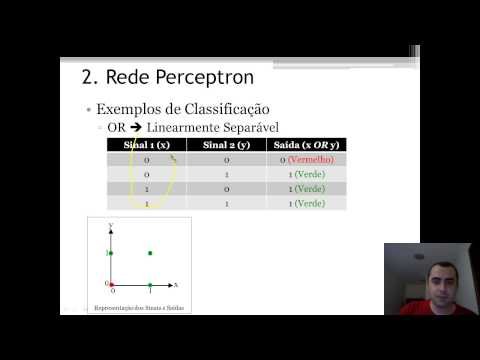

In [5]:
YouTubeVideo('pkAKtL9FvFI')

### Implementação no Scikit-Learn

A rede perceptron é utilizada em problemas que são ditos linearmente separáveis. Entende-se por esse tipo de problema aqueles que são compostos por dados que podem ser separados por uma função linear. Para isso, vamos criar um conjunto de dados que possuem tal característica. Como o propósito é só mostrar o funcionamento da rede, vamos criar um conjunto de dados sem nenhum próposito específico.

Os dados de entrada são constituídos de várias instâncias contendo duas variáveis cada ($x_1$ e $x_2$) e cada instância é classificada em 0 ou 1. Sendo assim, a tarefa da rede é aprender um modelo que seja capaz de separar estas duas classes. O código a seguir cria os dados e os exibem em um gráfico. 

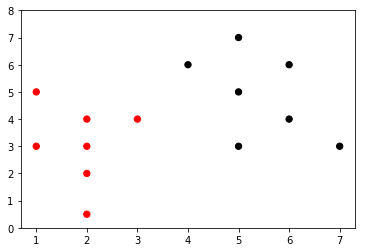

In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Criando os dados de entrada (x = features e y = classes)
x_train = np.array([[2., 2.],[1., 3.],[2., 3.],[5., 3.],[7., 3.],[2., 4.],[3., 4.],[6., 4.],
                    [1., 5.],[2., .5],[5., 5.],[4., 6.],[6., 6.],[5., 7.]],dtype="float32")
y_train = np.array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.], dtype="float32")

#Mostrando o Gráfico
A = x_train[:, 0]
B = x_train[:, 1]

colormap = np.array(['r', 'k'])

# Plot the original data
plt.scatter(A, B, c=colormap[[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]], s=40)

plt.ylim([0,8]) # Limit the y axis size
plt.show()

In [107]:
from sklearn.linear_model import perceptron

net = perceptron.Perceptron(n_iter=100, eta0=0.1, random_state=0, verbose=True)


X = x_train
y = y_train.T

net.fit(X,y)

-- Epoch 1
Norm: 1.04, NNZs: 2, Bias: 0.000000, T: 14, Avg. loss: 0.542857
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 2, Bias: -0.400000, T: 28, Avg. loss: 0.710714
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 2, Bias: -0.700000, T: 42, Avg. loss: 0.637500
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2, Bias: -0.900000, T: 56, Avg. loss: 0.626339
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.14, NNZs: 2, Bias: -1.000000, T: 70, Avg. loss: 0.533571
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 2, Bias: -1.300000, T: 84, Avg. loss: 0.507143
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 2, Bias: -1.500000, T: 98, Avg. loss: 0.491071
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.13, NNZs: 2, Bias: -1.600000, T: 112, Avg. loss: 0.443527
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.02, NNZs: 2, Bias: -1.800000, T: 126, Avg. loss: 0.407143
Total training time: 0.00 seconds.


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=100, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=True, warm_start=False)

Esse modelo treinado possui os seguintes valores para pesos e bias:

In [108]:
# Output the coefficints
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))

Coefficient 0 1.0
Coefficient 1 -0.3
Bias [-2.1]


(0, 8)

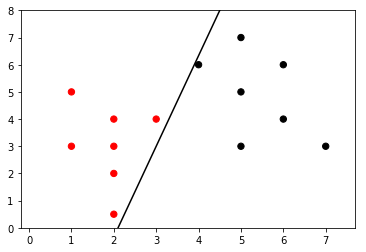

In [109]:
# Plot the original data
plt.scatter(A, B, c=colormap[[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]], s=40)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size

## O problema de redes com uma camada

"Uma limitação das redes neurais de uma comada, como as redes perceptron e adaline, é que elas conseguem classificar apenas objetos que são linearmente separáveis".

Supondo que tenhamos uma base de dados com dois atributos. Se plotarmos estes dados em um plano cartesiano, eles vão ser linearmente separáveis se existe uma reta que separa os objetos de uma classe dos objetos de outra classe. 

<img src="http://2.bp.blogspot.com/_NpEM479W8bw/SMAykBAnOUI/AAAAAAAAADE/qmpAY4AoyDo/s320/Linear.PNG">
<img src="http://4.bp.blogspot.com/_NpEM479W8bw/SMAykRqIgYI/AAAAAAAAADM/35mfeqXHi4k/s320/Non+Linear.PNG">

Se em vez de dois atributos a base possui $d$ atributos, o espaço de soluções será $d$-dimensional. Neste caso, os objetos são linearmente separáveis se houver um hiperplano que separe os dados das duas classes.

# Multilayer Perceptron

Uma rede perceptron multicamadas (*Multilayer Perceptron - MLP*) é caracterizada pela presença de pelo menos uma camada intermediária (escondida ou *hidden layer*) de neurônios, situada entre a camada de entrada e a respectiva camada neural de saída. Sendo assim, as MLP possuem pelo menos duas camadas de nurônios, o quais estarão distribuídos entre as camadas intermediárias e a camada de saída. 

A figura a seguir ilustra este modelo.

<img src="https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png" />

## Mais um exemplo

Para mostrar este modelo vamos utilizar o exemplo disponível em [neste link](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) com a base do MNIST para treinar o modelo criado.

Antes de começar a entrar em detalhes da rede, vamos baixar a base do MNIST que será utilizada. O MNIST é um dataset de dígitos escritos a mão. A tarefa consiste em dada uma imagem que representa um dígito escrito à mão classifica-la de acordo com o dígito que foi escrito. Detalhes da base podem ser encontrados [neste link](http://yann.lecun.com/exdb/mnist/). Por ser uma base bastante utilizada, a API do tensorflow já possui a base em um pacote do framework.

Cada imagem do dataset possui o tamanho de 28x28 e representa um dígito escrito à mão. A imagem a seguir ilustra uma instância da base:

<img src="https://www.tensorflow.org/images/MNIST-Matrix.png" width="70%" />

As imagens vão ser transformadas em um vetor de 784 posições ($28*28$). A entrada da rede são vários vetores deste tipo. Cada vetor vai representar uma imagem. A saída da rede é definida por um vetor de 10 posições, onde cada posição representa uma possível classe do dígito (a base do MNIST trabalha com dígitos de 0 a 9).

Se considerarmos que a base de treinamento possui 55000 imagens, as imagens a seguir representam a entrada e saída da rede, respectivamente:

<img src="https://www.tensorflow.org/images/mnist-train-xs.png" width="50%" />
<img src="https://www.tensorflow.org/images/mnist-train-ys.png" width="50%"/>

A diferença desta representação para o modelo que será implementado aqui é que o nosso modelo será alimentado por *batch*. 

Explicações dadas, vamos para o modelo que será implementado.

Jessica Yung em seu tutorial [Explaining TensorFlow code for a Multilayer Perceptron](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) faz uma imagem bem representativa do modelo que será implementado: 

<img src="http://i0.wp.com/www.jessicayung.com/wp-content/uploads/2016/12/multilayer-perceptron-drawing.png" />

O tutorial do link foi implementado no Tensoflow. Irei executa-lo utilizando o scikit-learn.

Uma questão importante no entendimento (e, consequentemente, na implementação) de qualquer modelo de rede neural é entender as dimensões dos dados ao passar por cada camada. A imagem anterior deixa isso bem claro. Por isso, vamos analisar camada por camada para que possamos entender como essas dimensões são modificadas. Na imagem, h1 e h2 são a quantidade de neurônios nas camadas intermediárias. A quantidade de neurônios de uma camada é que indica a dimensão da saída daquela camada. Outra informação importante é o tamanho do *batch* (já explicado anteriormente).

Com o batch igual a 100, a rede está recebendo como entrada uma matriz de 100x784, onde 784 é quantidade de pixel de cada imagem. Sendo assim, cada linha dessa matriz representa uma imagem da base de treinamento. Isso é passado para a primeira camada, onde será aplicada a seguinte operação $xW_1 + b_1$ onde, $W_1$ são os pesos de entrada e $b_1$, o *bias*. A imagem a seguir detalha esta operação juntamente com suas dimensões: 

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions1.png" width="70%" />

A saída da primeira camada é uma matriz 100x256, ou seja, 100 que representa a quantidade de instâncias que foram passadas na entrada e 256, a quantidade de neurônios. Ou seja, cada neurônio processou cada imagem e deu como resultado uma representação própria da entrada poderada pela operação definida. Ao resultado será aplicada uma função de ativação do tipo *RELU* (acesse o [tutorial da Jessica Yung](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) para ver detalhes do funcionamento deste tipo de função).

A entrada da segunda rede é uma matriz 100x256 (saída da camada anterior). As operações e dimensões da segunda camada são detalhadas na imagem a seguir:

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions2.png" width="70%" />

Assim, como na primeira camada, a saída é uma matriz 100x256 que será aplicada uma função de atividação do tipo *RELU*. A camada de saída recebe os dados da segunda e gera como saída uma vetor que represente as 10 classes. Nesse caso, a saída será de 100x10, por conta do *batch*. Em outras palavras, estamos gerando um vetor que pesa cada possível classe para cada uma das 100 instâncias passadas como entrada. A imagem ilustra as operações e dimensões da camada de saída.

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions3.png" width="70%" />

À saída da rede é aplicada a função Softmax que transforma os valores dos vetores em probabilidades. A posição que possuir o maior valor de probabilidade representa a classe à qual o dígito pertence. 

Uma rápida explicação de como funciona a softmax pode ser encontrada [neste vídeo](https://www.youtube.com/watch?v=G8eNWzxOgqE).

In [110]:
# Carregando a base. Se a base não existir a pasta "dataset/MNIST" será criada e a base salva nesta pasta.

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("dataset/MNIST", one_hot=True)

Extracting dataset/MNIST/train-images-idx3-ubyte.gz
Extracting dataset/MNIST/train-labels-idx1-ubyte.gz
Extracting dataset/MNIST/t10k-images-idx3-ubyte.gz
Extracting dataset/MNIST/t10k-labels-idx1-ubyte.gz


In [114]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(256,256), 
    activation='relu', 
    batch_size=100, 
    verbose=True, 
    max_iter=30, 
    learning_rate_init=0.001,
    alpha=0.1
)

In [115]:
mlp.fit(mnist.train.images, mnist.train.labels)

Iteration 1, loss = 0.83800205
Iteration 2, loss = 0.43285570
Iteration 3, loss = 0.35460286
Iteration 4, loss = 0.31787704
Iteration 5, loss = 0.29474050
Iteration 6, loss = 0.28121635
Iteration 7, loss = 0.27110933
Iteration 8, loss = 0.26465737
Iteration 9, loss = 0.25874980
Iteration 10, loss = 0.25684554
Iteration 11, loss = 0.25268586
Iteration 12, loss = 0.24871357
Iteration 13, loss = 0.24596697
Iteration 14, loss = 0.24512662
Iteration 15, loss = 0.24194122
Iteration 16, loss = 0.24272664
Iteration 17, loss = 0.24028118
Iteration 18, loss = 0.24015637
Iteration 19, loss = 0.23721731
Iteration 20, loss = 0.23562113
Iteration 21, loss = 0.23582592
Iteration 22, loss = 0.23537637
Iteration 23, loss = 0.23473001
Iteration 24, loss = 0.23165336
Iteration 25, loss = 0.23322918
Iteration 26, loss = 0.23277088
Iteration 27, loss = 0.23197229
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.1, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 256), learning_rate='constant',
       learning_rate_init=0.001, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [57]:
print(mlp.score(mnist.train.images, mnist.train.labels))
print(mlp.score(mnist.test.images, mnist.test.labels))

0.994418181818
0.9729


## Mais um exemplo

Vamos utilizar alguns dados mais complexos. Para isso vamos ver como se comporta a rede neural perceptron na base de dados: [http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [83]:
import pandas

data = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                   sep=",",
                   header=None,
                  names=["ClumpThickness","CellSize","CellShape","MarginalAdhesion","SingleEpithelialCellSize",
                        "BareNuclei","BlandChromatin","NormalNucleoli","Mitoses","Class"])
data = data.replace('?',0)
data.head()

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [91]:
from sklearn.utils import column_or_1d

X = data[["ClumpThickness","CellSize","CellShape","MarginalAdhesion","SingleEpithelialCellSize",
                        "BareNuclei","BlandChromatin","NormalNucleoli","Mitoses"]]


y = data[['Class']]
y = column_or_1d(y, warn=False)


In [95]:
mlp = MLPClassifier(hidden_layer_sizes=(256,256), activation='relu', batch_size=100, verbose=True, max_iter=100, learning_rate_init=0.001)

In [96]:
mlp.fit(X, y)

Iteration 1, loss = 0.57208848
Iteration 2, loss = 0.36214740
Iteration 3, loss = 0.27942772
Iteration 4, loss = 0.23048797
Iteration 5, loss = 0.20305766
Iteration 6, loss = 0.17697262
Iteration 7, loss = 0.15752645
Iteration 8, loss = 0.14203531
Iteration 9, loss = 0.12439814
Iteration 10, loss = 0.11726376
Iteration 11, loss = 0.10142125
Iteration 12, loss = 0.09136950
Iteration 13, loss = 0.08146351
Iteration 14, loss = 0.08325924
Iteration 15, loss = 0.07148325
Iteration 16, loss = 0.06797128
Iteration 17, loss = 0.06062067
Iteration 18, loss = 0.06177676
Iteration 19, loss = 0.05520534
Iteration 20, loss = 0.05268790
Iteration 21, loss = 0.05574553
Iteration 22, loss = 0.06088486
Iteration 23, loss = 0.05053892
Iteration 24, loss = 0.05377523
Iteration 25, loss = 0.04359878
Iteration 26, loss = 0.04073466
Iteration 27, loss = 0.03868192
Iteration 28, loss = 0.03683455
Iteration 29, loss = 0.04066236
Iteration 30, loss = 0.03533555
Iteration 31, loss = 0.03656038
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 256), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [97]:
mlp.score(X, y)



0.98426323319027187

In [100]:
# Importa o método de valiação cruzada 
from sklearn.model_selection import cross_val_score

# Aplica a validação cruzada (5 folds) no modelo KNN (k=3) criado anteriomente
scores = cross_val_score(mlp, X, y, cv=5, scoring='accuracy')
print(scores.mean())


Iteration 1, loss = 0.50793952
Iteration 2, loss = 0.32416109
Iteration 3, loss = 0.23539472
Iteration 4, loss = 0.19432221
Iteration 5, loss = 0.16066130
Iteration 6, loss = 0.14458280
Iteration 7, loss = 0.13453413
Iteration 8, loss = 0.12840170
Iteration 9, loss = 0.11468316
Iteration 10, loss = 0.09870359
Iteration 11, loss = 0.09525775
Iteration 12, loss = 0.08392771
Iteration 13, loss = 0.07950978
Iteration 14, loss = 0.08103237
Iteration 15, loss = 0.07248401
Iteration 16, loss = 0.07775154
Iteration 17, loss = 0.06585462
Iteration 18, loss = 0.06508291
Iteration 19, loss = 0.06291946
Iteration 20, loss = 0.05452736
Iteration 21, loss = 0.04937296
Iteration 22, loss = 0.04979110
Iteration 23, loss = 0.04200416
Iteration 24, loss = 0.04219834
Iteration 25, loss = 0.03800586
Iteration 26, loss = 0.03634493
Iteration 27, loss = 0.03271717
Iteration 28, loss = 0.02965996
Iteration 29, loss = 0.02775927
Iteration 30, loss = 0.02770117
Iteration 31, loss = 0.02749113
Iteration 32, los